In [8]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [9]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [10]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [11]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [12]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [13]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [14]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [15]:
# Create our session (link) from Python to the DB
Session = Session(engine)

# Exploratory Precipitation Analysis

In [18]:
# Find the most recent date in the data set.
Recent_date = Session.query(Measurement).order_by(Measurement.date.desc()).first()
print(Recent_date.date)

2017-08-23


2016-08-23


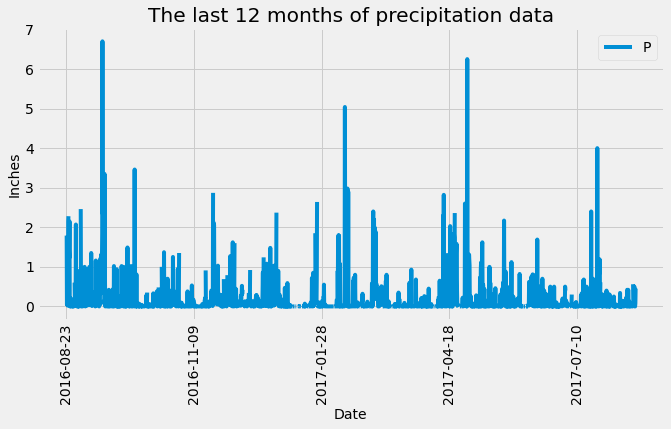

In [53]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
Query_date = dt.datetime.strptime(Recent_date.date, '%Y-%m-%d').date() - dt.timedelta(days=365)
# Calculate the date one year from the last date in data set.
print(Query_date)
# Perform a query to retrieve the data and precipitation scores
Prcp_data = Session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= Query_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
Prcp_df = pd.DataFrame(Prcp_data)
Prcp_df.set_index('date', inplace=True)
Prcp_df.head()

# Sort the dataframe by date
Prcp_df = Prcp_df.sort_values(by="date")
Prcp_df.head()

# Use Pandas Plotting with Matplotlib to plot the data

Prcp_df.plot(rot = 90, figsize = (10,5),use_index=True, legend=True, fontsize = 14)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Inches', fontsize = 14)
plt.legend('Precipitation', fontsize = 14)
plt.title('The last 12 months of precipitation data')
plt.show()


In [54]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [55]:
# Design a query to calculate the total number stations in the dataset
Session.query(func.count(Station.station)).all()

[(9)]

In [59]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


Active_stations = Session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

Active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [83]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#Most active station number is 'USC00519281'
Active_st = 'USC00519281'
station_temp = Session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), 
                             func.avg(Measurement.tobs)).filter(Measurement.station == Active_st).all()
station_temp
print(f"Min temperature: {station_temp[0][0]}")
print(f"Max temperature: {station_temp[0][1]}")
print(f"Avg temperature: {station_temp[0][2]}")


Min temperature: 54.0
Max temperature: 85.0
Avg temperature: 71.66378066378067


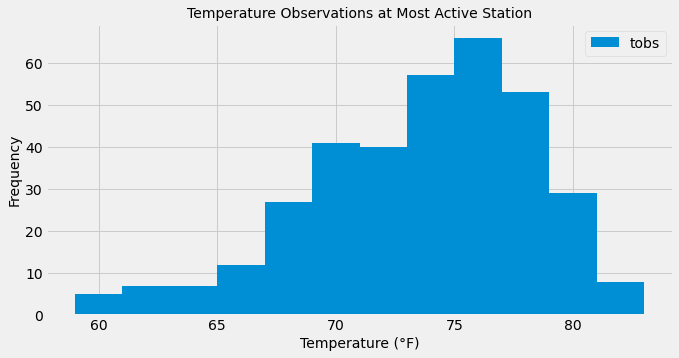

In [90]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

most_active_st = Session.query(Measurement.tobs, Measurement.date).filter(Measurement.date>=Query_date).filter(Measurement.station == Active_st).all()
most_st_df = pd.DataFrame(most_active_st)
most_st_df.plot.hist(bins=12, figsize = (10,5))
plt.xlabel('Temperature (°F)', fontsize =14)
plt.ylabel('Frequency', fontsize =14)
plt.title('Temperature Observations at Most Active Station', fontsize =14)
plt.show()

# Close session

In [ ]:
# Close Session
session.close()